# Jupyter Notebook to be used for IBM Applied Data Science Capstone

In [1]:
import pandas as pd
import numpy as np

In [2]:
print('Hello Capstone Project Course!')

Hello Capstone Project Course!


In [5]:
df = pd.read_csv('Data-Collisions.csv')

C:\Users\ayush\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [19]:
df.shape

(194673, 38)

In [20]:
features=['SDOT_COLCODE','ST_COLCODE','SDOTCOLNUM','LIGHTCOND','ROADCOND','WEATHER','LOCATION']

In [21]:
# Class count
count_class_1, count_class_2 = df.SEVERITYCODE.value_counts()

df.SEVERITYCODE.value_counts()

1    136485
2     58188
Name: SEVERITYCODE, dtype: int64

In [22]:
# Divide by class
df_class_1 = df[df['SEVERITYCODE'] == 1]
df_class_2 = df[df['SEVERITYCODE'] == 2]

Random under-sampling:
2    58188
1    58188
Name: SEVERITYCODE, dtype: int64


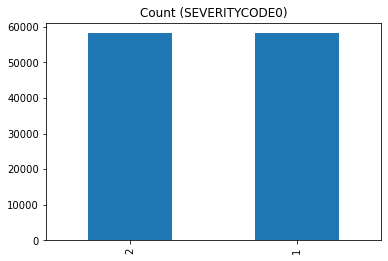

In [25]:
df_class_1_under = df_class_1.sample(count_class_2)
df_under = pd.concat([df_class_1_under, df_class_2], axis=0)

print('Random under-sampling:')
print(df_under.SEVERITYCODE.value_counts())

df_under.SEVERITYCODE.value_counts().plot(kind='bar', title='Count (SEVERITYCODE0)')

In [30]:
X = df_under[features]
y = df_under['SEVERITYCODE']

In [31]:
from sklearn.preprocessing import LabelEncoder

for f in features:
    le = LabelEncoder().fit(X[f])
    X[f] = le.transform(X[f])

<ipython-input-31-5e4ab98a3f84>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[f] = le.transform(X[f])


TypeError: Encoders require their input to be uniformly strings or numbers. Got ['float', 'int', 'str']

In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y)

In [28]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier().fit(X_train,y_train)
clf.score(X_test,y_test)

ValueError: could not convert string to float: ''